In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Exploratory Data Analysis

#Loading dataset
df = pd.read_excel(r"C:\Users\navin\Downloads\iris (1).xls")
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df['Classification'].nunique()

3

In [9]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [11]:
df['Classification'].value_counts(normalize= True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [12]:
#Preprocessing the dataset

#checking null values

df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
df.duplicated().sum()

3

In [14]:
df[df.duplicated()] 

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(147, 5)

In [17]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


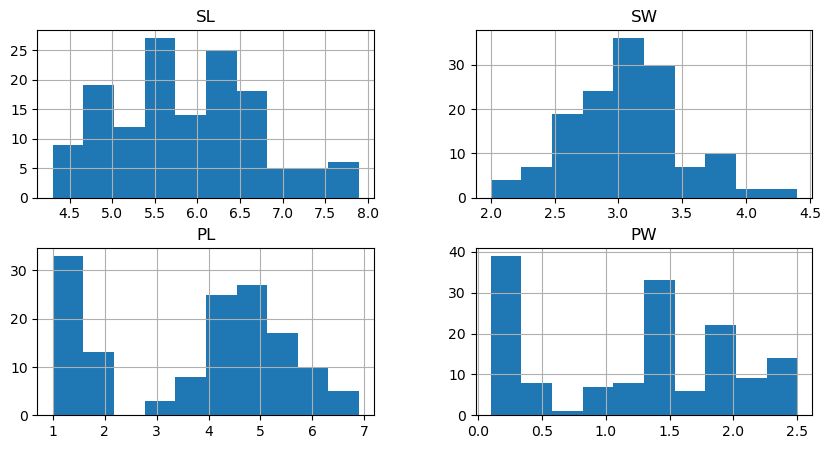

In [18]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [20]:
# replacing the NaN values with the median

for col in ['SL','SW','PL','PW']:
    df[col]= df[col].fillna(df[col].median()) 


In [21]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [22]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [26]:
#Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [28]:
df.shape

(147, 5)

In [30]:
#finding correlation
df.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.098734,0.828716,0.799399,0.774153
SW,-0.098734,1.000000,-0.405123,-0.337745,-0.402077
PL,0.828716,-0.405123,1.000000,0.934041,0.925788
PW,0.799399,-0.337745,0.934041,1.000000,0.955693
Classification,0.774153,-0.402077,0.925788,0.955693,1.000000


<AxesSubplot:>

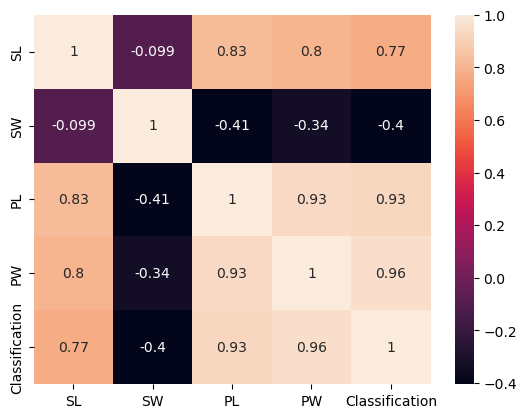

In [31]:
#Visualizing Relationships between features
#heatmap

import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [34]:
#Initializing x and y where x is dependent and y is independent variable.

y= df['Classification'] # we have target in y
x = df.drop(['Classification'],axis=1)

In [35]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,4.4,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 147, dtype: int32

In [38]:
#Split the data for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)


In [39]:
x_train.shape


(117, 4)

In [40]:
x_test.shape


(30, 4)

In [41]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [42]:
x_train


array([[ 0.60400703,  0.08972871,  0.95006763,  0.76726863],
       [-1.65538693,  0.32302336, -1.44356389, -1.36694663],
       [-0.40016807, -0.61015524,  0.59978009,  1.03404553],
       [-0.90225561, -0.14356594, -1.38518263, -1.36694663],
       [-1.15329938,  1.25620196, -1.44356389, -1.36694663],
       [ 1.60818212, -0.14356594,  1.1252114 ,  0.50049172],
       [ 2.48683532,  1.72279126,  1.47549894,  1.03404553],
       [ 0.35296325,  0.78961266,  0.89168637,  1.43421089],
       [-1.0277775 ,  1.72279126, -1.15165761, -1.10016972],
       [-0.65121184,  1.95608591, -1.50194515, -1.10016972],
       [-0.65121184, -0.14356594, -1.38518263, -1.36694663],
       [ 2.23579155,  1.72279126,  1.65064271,  1.30082244],
       [ 0.47848514, -1.77662849,  0.30787381,  0.10032636],
       [-0.14912429,  0.08972871,  0.7165426 ,  1.43421089],
       [ 0.8550508 , -0.37686059,  0.42463632,  0.10032636],
       [-0.27464618, -0.14356594,  0.19111129, -0.0330621 ],
       [ 1.10609457,  0.

In [43]:
df.Classification.value_counts(normalize=True)


1    0.340136
2    0.333333
0    0.326531
Name: Classification, dtype: float64

In [44]:
x_test


array([[ 5.38184001e-01, -1.10791726e-15,  7.96877412e-01,
         8.44513839e-01],
       [-2.01305466e-01, -1.74636552e+00,  2.70821419e-01,
         1.98202227e-01],
       [ 1.27767347e+00,  2.49480789e-01,  1.20603207e+00,
         1.62008777e+00],
       [-6.94298444e-01,  1.99584631e+00, -1.19044523e+00,
        -1.09442100e+00],
       [ 1.68439268e-01, -1.24740394e+00,  5.63074748e-01,
         7.15251517e-01],
       [-1.06404318e+00, -1.10791726e-15, -1.24889589e+00,
        -1.35294564e+00],
       [ 4.14935757e-01, -2.49480789e-01,  5.63074748e-01,
         4.56726872e-01],
       [-3.24553711e-01,  9.97923155e-01, -1.19044523e+00,
        -9.65158673e-01],
       [ 4.14935757e-01, -7.48442366e-01,  9.13778743e-01,
         5.85989194e-01],
       [-9.40794934e-01,  2.49480789e-01, -1.19044523e+00,
        -1.35294564e+00],
       [-8.17546689e-01,  9.97923155e-01, -1.13199456e+00,
        -9.65158673e-01],
       [-6.94298444e-01, -1.10791726e-15, -3.13685240e-01,
      

In [45]:
#Logistic regression Model


In [46]:
#Building and Evaluating the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(x_train,y_train)

In [47]:
y_pred_lr = model.predict(x_test)
y_pred_lr

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
result = confusion_matrix(y_test,y_pred_lr)
print('Confusion Matrix:\n', result)
result1 = classification_report(y_test,y_pred_lr)
print('Classification Report:\n',result1)
result2 = accuracy_score(y_test,y_pred_lr)
print('Accuracy:\n',result2)

Confusion Matrix:
 [[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

Accuracy:
 0.9333333333333333


In [51]:
accuracy=accuracy_score(y_test,y_pred_lr)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 93.33


In [52]:
predictions = model.predict(x_test)

#compare predicted values with the actual scores

compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,1,1
2,2,2
3,0,0
4,2,2
5,0,0
6,1,1
7,0,0
8,1,2
9,0,0


In [53]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [54]:
metric_k

[0.9,
 0.9333333333333333,
 0.9,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

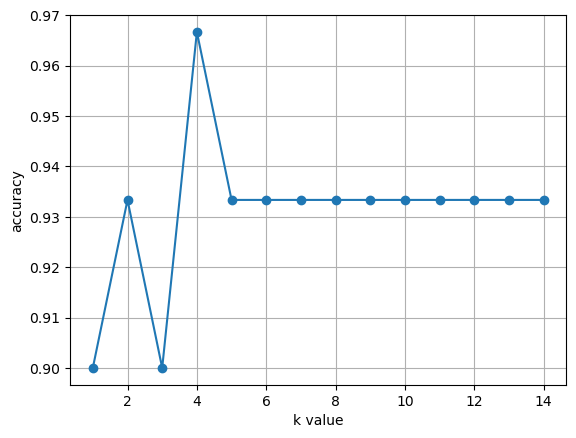

In [55]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [56]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_knn = model.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)
metric_k.append(acc)

C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
y_pred_lr


array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
result = confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix:\n', result)
result1 = classification_report(y_test,y_pred_knn)
print('Classification Report:\n',result1)
result2 = accuracy_score(y_test,y_pred_knn)
print('Accuracy:\n',result2)

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy:
 0.9666666666666667


In [60]:
accuracy=accuracy_score(y_test,y_pred_knn)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.67


In [61]:
#SVM Model

In [62]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
y_pred_svm = svmclf.predict(x_test)


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [65]:
print("accuracy =",accuracy_score(y_test,y_pred_svm))


accuracy = 0.9333333333333333


In [66]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 93.33


In [67]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


In [68]:
#rbf
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.9333333333333333


In [69]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 93.33


In [71]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


In [72]:
#poly
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.9333333333333333


In [73]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 93.33


In [74]:
#Decision Tree Model


In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_dt = dt_clf.predict(x_test)


In [77]:
print("accuracy =",accuracy_score(y_test,y_pred_dt))


accuracy = 1.0


In [78]:
accuracy=accuracy_score(y_test,y_pred_dt)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


In [79]:
print(confusion_matrix(y_test,y_pred_dt))


[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [80]:
#Random Forest Model


In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred_rf = rf_clf.predict(x_test)


In [83]:
print("accuracy =",accuracy_score(y_test,y_pred_rf))


accuracy = 0.9666666666666667


In [84]:
accuracy=accuracy_score(y_test,y_pred_rf)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.67


In [85]:
print(confusion_matrix(y_test,y_pred_rf))


[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [86]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [87]:
y_pred_rf = rf_clf.predict(x_test)


In [88]:
print("accuracy =",accuracy_score(y_test,y_pred_rf))


accuracy = 0.9666666666666667


In [89]:
print(confusion_matrix(y_test,y_pred_rf))


[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [ ]:
#conclution

#from above we can understood  that Decision Tree model gives us 100% accuracy and the confusion matrix generated along with that is also perfectly predicting 0,1,2 as such
#Therefore Decision Tree gives us the best model.